In [1]:
from mhctools import MHCflurry

from Bio.Seq import Seq
from Bio.SeqRecord import SeqRecord
from Bio import SeqIO

from bs4 import BeautifulSoup
import re

In [2]:
INPUT_FASTA_PATH = '/home/timofeiryko/Desktop/Coding/rnavaccine/Flavivirus_cleaned.FASTA'
INPUT_CHECK_FASTA_PATH = '/home/timofeiryko/Desktop/Coding/rnavaccine/West Nile virus_cleaned.FASTA'
SECOND_CHECK_FASTA_PATH = '/home/timofeiryko/Desktop/Coding/rnavaccine/Tick-borne encephalitis virus_cleaned.FASTA'

PROTEINS = ['ps-ssRNAv_RdRp-like Superfamily',
 'RRM_SF Superfamily',
 'Flavi_M Superfamily',
 'Flavi_NS5_thumb',
 'Flavi_M',
 'Flavi_NS5',
 'Peptidase_S7 Superfamily',
 'Flavivirus_RdRp',
 'ps-ssRNAv_Flaviviridae_RdRp',
 'RRM2_U1A',
 'RRM1_U1A',
 'Flavi_DEAD',
 'Peptidase_S31',
 'Peptidase_S7',
 'Flavi_glycoprot',
 'Flavi_propep',
 'Flavi_capsid',
 'STAT_CCD Superfamily',
 'STAT_DBD Superfamily',
 'Flavi_M']

INPUT_CD_IDS = ['cl40470',
 'cl17169',
 'cl03065',
 'pfam20483',
 'pfam01004',
 'pfam00972',
 'cl29867',
 'cd23204',
 'cd23178',
 'cd12480',
 'cd12477',
 'pfam07652',
 'pfam05578',
 'pfam00949',
 'pfam00869',
 'pfam01570',
 'pfam01003',
 'cl28921',
 'cl28920',
 'cd17038']

In [3]:
GROUP = INPUT_FASTA_PATH.split('/')[-1].removesuffix('_cleaned.FASTA')
GROUP

'Flavivirus'

In [4]:
# Initialize an empty dictionary to hold the sequences
fasta_dict = {}

# Read the FASTA file and populate the dictionary
with open(INPUT_FASTA_PATH, 'r') as fasta_file:
    for record in SeqIO.parse(fasta_file, 'fasta'):
        fasta_dict[record.id] = str(record.seq)  # Store the ID and sequence as a string

fasta_dict

{'pfam20483': 'WSLDETAWLSKAYANMWLVNYFHLRTARALGFAYKSAVPPNWVPTGRTTGSIHRPGPWMTPEDMLDVWNRVWFGEST',
 'pfam01004': 'VALPPHVGLGLETRTETWMSSRGAWKQLQKVETWALRNPGFTVIALFIAHLIGSSITQKVIIFILLLLVTPAYS',
 'pfam00972': 'TYEADVILGIGTRSVATDKEPLNKEIIGERIERIKNEHMTTWFYDEDNPYRTWAYHGSYETKTSGSASSMVNGVVRLLTKPWDVIEEVTRIAMTDTTPFGQQRVFKEKVDTRAPDPPAGTRQIMKVVNRWLWRHLAREKNPRLCTKEEFIAKVRSNAAIGAYFEEEEQWKTANEAVQDPRFWELVDRERELHQQGRCRTCVYNMMGKREKKLGEFGKAKGSRAIWYMWLGARFLEFEALGFLNEDHWASRENSGGGVEGIGLQYLGYILRDLAAMPGGGMYADDTAGWDTRITEADLDNEAEITNYMEPHHKKLAQAVMKMTYQNKVVKVLRPAPGGKTVMDVISRRDQRGSGQVVTYALNTFTNLKVQLIRMMEAEMVIHHQHLQDCDES',
 'cd23204': 'APRLKRVEDWLEENGEERLSRMAVSGDDCVVKPIDDRFATALTFLNDMGKVRKDIQEWEPSKGWNDWEEVPFCSHHFHELIMKDGRTLVVPCRDQDELIGRARVSPGAGWSLRETACLSKAYAQMWLLMYFHRRDLRLMANAICSAVPVDWVPTGRTTWSIHAKGEWMTTEDMLEVWNRVWIEDNPWMEDKTPVTSWRDVPYLGKREDQWCGSLIGLRSRATWAKNIQTAVN',
 'cd23178': 'IRLPTMLVCGDDCVVICESDGTQEDAALLAAFTEALTRYGKPPKDPPQ',
 'cd12480': 'PPQPVSENPPNHILFLTNLPEETNELMLSMLFNQFPGFKEVRLVPGRHDIAFVEFDNEVQAGAAREALQGFKITQSNAM

In [5]:
predictor = MHCflurry(alleles=[
    'A1',
    'A2',
    'A3',
    'A24',
    'A26',
    'B7',
    'B8',
    'B27',
    'B39',
    'B58'
])
# List is taken from the literature

2024-09-19 12:12:46.189176: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-19 12:12:46.191388: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-19 12:12:46.266563: I external/local_tsl/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-09-19 12:12:46.308545: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:479] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-19 12:12:46.378670: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:10575] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registe

In [6]:
binding_predictions = predictor.predict_subsequences(fasta_dict, peptide_lengths=[10, 12, 15])

/home/timofeiryko/micromamba/envs/rnavac/lib/python3.11/site-packages/mhcflurry/amino_acid.py:132: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = df.replace(letter_to_index_dict)


2/2 [==============================] - 6s 88ms/step


/home/timofeiryko/micromamba/envs/rnavac/lib/python3.11/site-packages/mhcflurry/amino_acid.py:132: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = df.replace(letter_to_index_dict)


2/2 [==============================] - 1s 96ms/step


/home/timofeiryko/micromamba/envs/rnavac/lib/python3.11/site-packages/mhcflurry/amino_acid.py:132: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = df.replace(letter_to_index_dict)


2/2 [==============================] - 1s 81ms/step


/home/timofeiryko/micromamba/envs/rnavac/lib/python3.11/site-packages/mhcflurry/amino_acid.py:132: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = df.replace(letter_to_index_dict)


2/2 [==============================] - 0s 48ms/step


/home/timofeiryko/micromamba/envs/rnavac/lib/python3.11/site-packages/mhcflurry/amino_acid.py:132: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = df.replace(letter_to_index_dict)


2/2 [==============================] - 0s 83ms/step


/home/timofeiryko/micromamba/envs/rnavac/lib/python3.11/site-packages/mhcflurry/amino_acid.py:132: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = df.replace(letter_to_index_dict)


2/2 [==============================] - 0s 57ms/step


/home/timofeiryko/micromamba/envs/rnavac/lib/python3.11/site-packages/mhcflurry/amino_acid.py:132: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = df.replace(letter_to_index_dict)


2/2 [==============================] - 0s 56ms/step


/home/timofeiryko/micromamba/envs/rnavac/lib/python3.11/site-packages/mhcflurry/amino_acid.py:132: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = df.replace(letter_to_index_dict)


2/2 [==============================] - 0s 53ms/step


/home/timofeiryko/micromamba/envs/rnavac/lib/python3.11/site-packages/mhcflurry/amino_acid.py:132: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = df.replace(letter_to_index_dict)


2/2 [==============================] - 0s 57ms/step


/home/timofeiryko/micromamba/envs/rnavac/lib/python3.11/site-packages/mhcflurry/amino_acid.py:132: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  result = df.replace(letter_to_index_dict)


2/2 [==============================] - 0s 57ms/step


In [7]:
# flatten binding predictions into a Pandas DataFrame
df = binding_predictions.to_dataframe()

In [8]:
def attach_proteins(row):
    domain = row['source_sequence_name']
    i = INPUT_CD_IDS.index(domain)
    protein = PROTEINS[i]
    return protein

In [9]:
df['protein'] = df.apply(attach_proteins, axis=1)

In [10]:
strong_binders = df[df.affinity < 100].sort_values(by='affinity')
strong_binders

,source_sequence_name,offset,peptide,allele,score,affinity,percentile_rank,prediction_method_name,length,protein
17056,pfam00972,328,KVLRPAPGGK,HLA-A*03:01,0.683638,30.660163,0.033500,mhcflurry,10,Flavi_NS5
22209,cd23204,137,LMANAICSAV,HLA-A*02:01,0.681705,31.308364,0.204000,mhcflurry,10,Flavivirus_RdRp
18419,pfam00972,197,RTCVYNMMGK,HLA-A*03:01,0.678202,32.517733,0.042875,mhcflurry,10,Flavi_NS5
27417,cd23204,167,MTTEDMLEVW,HLA-B*58:01,0.677706,32.692535,0.024000,mhcflurry,10,Flavivirus_RdRp
14835,pfam01003,2,AIAPTPGLKK,HLA-A*03:01,0.676649,33.068641,0.047000,mhcflurry,10,Flavi_capsid
...,...,...,...,...,...,...,...,...,...,...
18858,cd12477,4,TIYINNLNEK,HLA-A*03:01,0.577105,97.089152,0.390125,mhcflurry,10,RRM1_U1A
14841,pfam00869,47,AIDNPAELRK,HLA-A*03:01,0.576226,98.017432,0.393750,mhcflurry,10,Flavi_glycoprot
28584,pfam00972,170,TANEAVQDPRFW,HLA-B*58:01,0.575532,98.755782,0.251375,mhcflurry,12,Flavi_NS5
1039,cd17038,18,ERWVLRNPGY,HLA-B*27:01,0.575103,99.214977,0.448750,mhcflurry,10,Flavi_M


In [11]:
strong_binders.head(10)

,source_sequence_name,offset,peptide,allele,score,affinity,percentile_rank,prediction_method_name,length,protein
17056,pfam00972,328,KVLRPAPGGK,HLA-A*03:01,0.683638,30.660163,0.033500,mhcflurry,10,Flavi_NS5
22209,cd23204,137,LMANAICSAV,HLA-A*02:01,0.681705,31.308364,0.204000,mhcflurry,10,Flavivirus_RdRp
18419,pfam00972,197,RTCVYNMMGK,HLA-A*03:01,0.678202,32.517733,0.042875,mhcflurry,10,Flavi_NS5
27417,cd23204,167,MTTEDMLEVW,HLA-B*58:01,0.677706,32.692535,0.024000,mhcflurry,10,Flavivirus_RdRp
14835,pfam01003,2,AIAPTPGLKK,HLA-A*03:01,0.676649,33.068641,0.047000,mhcflurry,10,Flavi_capsid
15052,pfam00972,316,AVMKMTYQNK,HLA-A*03:01,0.675155,33.607404,0.049750,mhcflurry,10,Flavi_NS5
18471,pfam05578,173,RVVGRVKVGK,HLA-A*03:01,0.669640,35.673925,0.064375,mhcflurry,10,Peptidase_S31
18337,pfam00869,289,RLKLDALTLK,HLA-A*03:01,0.667159,36.644625,0.069250,mhcflurry,10,Flavi_glycoprot
17555,cd12480,29,MLFNQFPGFK,HLA-A*03:01,0.664129,37.865956,0.078375,mhcflurry,10,RRM2_U1A
27414,pfam20483,58,MTPEDMLDVW,HLA-B*58:01,0.660411,39.420310,0.048250,mhcflurry,10,Flavi_NS5_thumb


In [12]:
# Define the output FASTA file path
output_fasta_file = f'selected_{GROUP}.fasta'

# Prepare to store SeqRecord objects
records = []

# Create SeqRecord objects for each peptide in the DataFrame
for index, row in strong_binders.iterrows():
    sequence = row['peptide']
    # Create a SeqRecord object
    record = SeqRecord(Seq(sequence), id=f'peptide_{index + 1}', description="")
    records.append(record)

# Write the SeqRecord objects to the FASTA file
with open(output_fasta_file, 'w') as fasta_file:
    SeqIO.write(records, fasta_file, "fasta")

print(f"FASTA file '{output_fasta_file}' has been created.")

FASTA file 'selected_Flavivirus.fasta' has been created.


In [13]:
vaxigen_html = '''
<td align="left" bgcolor="#dddddd" colspan="1" height="35">
              <b><h1>Model selected: <font color="#0000FF">virus</font></h1></b><h3>Threshold for this model: <font color="#0000FF">0.5</font></h3><br><br>&gt;peptide_12148
 Overall Protective Antigen Prediction =<b> 0.5580 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt;peptide_7483
 Overall Protective Antigen Prediction =<b> 0.0488 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt;peptide_13511
 Overall Protective Antigen Prediction =<b> -0.4208 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt;peptide_17600
 Overall Protective Antigen Prediction =<b> -0.1227 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt;peptide_9927
 Overall Protective Antigen Prediction =<b> 0.5147 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt;peptide_10144
 Overall Protective Antigen Prediction =<b> 0.9776 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt;peptide_13563
 Overall Protective Antigen Prediction =<b> -0.0522 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt;peptide_13429
 Overall Protective Antigen Prediction =<b> 0.7841 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt;peptide_12647
 Overall Protective Antigen Prediction =<b> -0.2509 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt;peptide_17597
 Overall Protective Antigen Prediction =<b> -0.0907 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt;peptide_11799
 Overall Protective Antigen Prediction =<b> 0.5307 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt;peptide_22526
 Overall Protective Antigen Prediction =<b> 1.0316 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt;peptide_8527
 Overall Protective Antigen Prediction =<b> -0.1502 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt;peptide_8539
 Overall Protective Antigen Prediction =<b> 0.8250 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt;peptide_13722
 Overall Protective Antigen Prediction =<b> 1.1713 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt;peptide_19536
 Overall Protective Antigen Prediction =<b> 1.3028 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt;peptide_13707
 Overall Protective Antigen Prediction =<b> 0.5800 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt;peptide_18518
 Overall Protective Antigen Prediction =<b> -0.2883 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt;peptide_40816
 Overall Protective Antigen Prediction =<b> 1.4862 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt;peptide_13535
 Overall Protective Antigen Prediction =<b> -0.5223 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt;peptide_18408
 Overall Protective Antigen Prediction =<b> 0.7616 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt;peptide_11544
 Overall Protective Antigen Prediction =<b> 0.6710 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt;peptide_42694
 Overall Protective Antigen Prediction =<b> 0.0857 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt;peptide_23180
 Overall Protective Antigen Prediction =<b> 1.5164 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt;peptide_13800
 Overall Protective Antigen Prediction =<b> 0.8225 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt;peptide_48053
 Overall Protective Antigen Prediction =<b> 0.4288 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt;peptide_46208
 Overall Protective Antigen Prediction =<b> 0.8887 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt;peptide_43212
 Overall Protective Antigen Prediction =<b> 0.4075 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt;peptide_19010
 Overall Protective Antigen Prediction =<b> 0.3494 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt;peptide_21689
 Overall Protective Antigen Prediction =<b> 0.3681 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt;peptide_19334
 Overall Protective Antigen Prediction =<b> 0.5794 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt;peptide_42941
 Overall Protective Antigen Prediction =<b> 0.7275 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt;peptide_23976
 Overall Protective Antigen Prediction =<b> -0.2105 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt;peptide_12045
 Overall Protective Antigen Prediction =<b> 0.3550 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt;peptide_22731
 Overall Protective Antigen Prediction =<b> 0.6125 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt;peptide_42343
 Overall Protective Antigen Prediction =<b> 0.3630 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt;peptide_19163
 Overall Protective Antigen Prediction =<b> 0.7506 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt;peptide_21685
 Overall Protective Antigen Prediction =<b> 0.5658 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt;peptide_5102
 Overall Protective Antigen Prediction =<b> -0.0870 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt;peptide_14839
 Overall Protective Antigen Prediction =<b> 0.9355 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt;peptide_20010
 Overall Protective Antigen Prediction =<b> 1.1545 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt;peptide_39555
 Overall Protective Antigen Prediction =<b> 1.0671 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt;peptide_13261
 Overall Protective Antigen Prediction =<b> 0.3039 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt;peptide_16050
 Overall Protective Antigen Prediction =<b> 0.5477 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt;peptide_5105
 Overall Protective Antigen Prediction =<b> 0.0024 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt;peptide_17212
 Overall Protective Antigen Prediction =<b> 1.2447 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt;peptide_10038
 Overall Protective Antigen Prediction =<b> 0.3580 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt;peptide_39716
 Overall Protective Antigen Prediction =<b> 0.0730 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt;peptide_11317
 Overall Protective Antigen Prediction =<b> 0.6579 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt;peptide_11849
 Overall Protective Antigen Prediction =<b> 0.6448 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt;peptide_18203
 Overall Protective Antigen Prediction =<b> 0.7114 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt;peptide_11243
 Overall Protective Antigen Prediction =<b> 0.0860 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt;peptide_43836
 Overall Protective Antigen Prediction =<b> -0.5318 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt;peptide_33102
 Overall Protective Antigen Prediction =<b> 1.1021 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt;peptide_43851
 Overall Protective Antigen Prediction =<b> 0.7995 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt;peptide_24342
 Overall Protective Antigen Prediction =<b> -0.5587 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt;peptide_43215
 Overall Protective Antigen Prediction =<b> 0.0137 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt;peptide_40832
 Overall Protective Antigen Prediction =<b> -0.2690 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt;peptide_17015
 Overall Protective Antigen Prediction =<b> 0.1817 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt;peptide_11045
 Overall Protective Antigen Prediction =<b> -0.2825 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt;peptide_13842
 Overall Protective Antigen Prediction =<b> 0.9338 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt;peptide_22538
 Overall Protective Antigen Prediction =<b> 1.5932 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt;peptide_18313
 Overall Protective Antigen Prediction =<b> 0.6006 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt;peptide_41545
 Overall Protective Antigen Prediction =<b> 0.0338 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt;peptide_5108
 Overall Protective Antigen Prediction =<b> 1.6590 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt;peptide_11985
 Overall Protective Antigen Prediction =<b> 0.6966 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt;peptide_8816
 Overall Protective Antigen Prediction =<b> -0.4885 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt;peptide_13950
 Overall Protective Antigen Prediction =<b> 0.6241 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt;peptide_9933
 Overall Protective Antigen Prediction =<b> -0.1699 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt;peptide_18767
 Overall Protective Antigen Prediction =<b> 0.0972 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt;peptide_40312
 Overall Protective Antigen Prediction =<b> -0.5434 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt;peptide_18740
 Overall Protective Antigen Prediction =<b> -0.0556 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br><table border="0" cellspacing="0" cellpadding="2" align="CENTER" width="100%">
<tbody><tr>

</tr>




</tbody></table></td>
'''

In [14]:
soup = BeautifulSoup(vaxigen_html, 'html.parser')
# Find all <b> tags and extract the text that matches the pattern
predictions = []
for b_tag in soup.find_all('b'):
    try:
        prediction = float(b_tag.text.strip())
        predictions.append(prediction)
    except:
        continue

assert len(strong_binders) == len(predictions)

In [15]:
strong_binders['vaxigen_score'] = predictions

In [16]:
selected_strong_binders = strong_binders[strong_binders.vaxigen_score >= 0.5]
selected_strong_binders

,source_sequence_name,offset,peptide,allele,score,affinity,percentile_rank,prediction_method_name,length,protein,vaxigen_score
17056,pfam00972,328,KVLRPAPGGK,HLA-A*03:01,0.683638,30.660163,0.033500,mhcflurry,10,Flavi_NS5,0.5580
14835,pfam01003,2,AIAPTPGLKK,HLA-A*03:01,0.676649,33.068641,0.047000,mhcflurry,10,Flavi_capsid,0.5147
15052,pfam00972,316,AVMKMTYQNK,HLA-A*03:01,0.675155,33.607404,0.049750,mhcflurry,10,Flavi_NS5,0.9776
18337,pfam00869,289,RLKLDALTLK,HLA-A*03:01,0.667159,36.644625,0.069250,mhcflurry,10,Flavi_glycoprot,0.7841
16707,pfam05578,191,IMSGIQTVSK,HLA-A*03:01,0.653656,42.409158,0.107250,mhcflurry,10,Peptidase_S31,0.5307
47070,pfam00972,226,MWLGARFLEF,HLA-A*24:01,0.652224,43.071490,0.066750,mhcflurry,10,Flavi_NS5,1.0316
23265,pfam05578,93,RLTDETEYGV,HLA-A*02:01,0.647155,45.499526,0.323375,mhcflurry,10,Peptidase_S31,0.8250
18630,cd12477,64,SMQGFPFYDK,HLA-A*03:01,0.644622,46.763642,0.140375,mhcflurry,10,RRM1_U1A,1.1713
29353,cd17038,27,YALAAVALAW,HLA-B*58:01,0.644530,46.810478,0.078250,mhcflurry,10,Flavi_M,1.3028
18615,cd23204,110,SLRETACLSK,HLA-A*03:01,0.643050,47.565886,0.143375,mhcflurry,10,Flavivirus_RdRp,0.5800


In [23]:
selected_strong_binders.drop(columns=['allele', 'prediction_method_name']).head(10)

,source_sequence_name,offset,peptide,score,affinity,percentile_rank,length,protein,vaxigen_score
17056,pfam00972,328,KVLRPAPGGK,0.683638,30.660163,0.033500,10,Flavi_NS5,0.5580
14835,pfam01003,2,AIAPTPGLKK,0.676649,33.068641,0.047000,10,Flavi_capsid,0.5147
15052,pfam00972,316,AVMKMTYQNK,0.675155,33.607404,0.049750,10,Flavi_NS5,0.9776
18337,pfam00869,289,RLKLDALTLK,0.667159,36.644625,0.069250,10,Flavi_glycoprot,0.7841
16707,pfam05578,191,IMSGIQTVSK,0.653656,42.409158,0.107250,10,Peptidase_S31,0.5307
47070,pfam00972,226,MWLGARFLEF,0.652224,43.071490,0.066750,10,Flavi_NS5,1.0316
23265,pfam05578,93,RLTDETEYGV,0.647155,45.499526,0.323375,10,Peptidase_S31,0.8250
18630,cd12477,64,SMQGFPFYDK,0.644622,46.763642,0.140375,10,RRM1_U1A,1.1713
29353,cd17038,27,YALAAVALAW,0.644530,46.810478,0.078250,10,Flavi_M,1.3028
18615,cd23204,110,SLRETACLSK,0.643050,47.565886,0.143375,10,Flavivirus_RdRp,0.5800


In [24]:
selected_strong_binders.to_csv('flavivirus_mhc1_epitopes.csv')

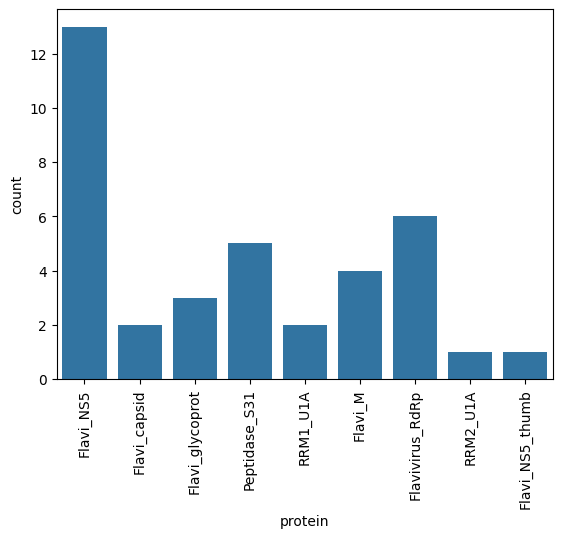

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(selected_strong_binders, x='protein' )

# Rotate x-axis labels by 90 degrees
plt.xticks(rotation=90)

# Show the plot
plt.show()

# Check that epitopes are found in particular viruses

In [23]:
# Initialize an empty dictionary to hold the sequences
check_fasta_dict = {}

# Read the FASTA file and populate the dictionary
with open(INPUT_CHECK_FASTA_PATH, 'r') as fasta_file:
    for record in SeqIO.parse(fasta_file, 'fasta'):
        check_fasta_dict[record.id] = str(record.seq)  # Store the ID and sequence as a string

check_fasta_dict

{'cd23204': 'APRLKRVEDWLEENGEERLSRMAVSGDDCVVKPIDDRFATALTFLNDMGKVRKDIQEWEPSKGWNDWEEVPFCSHHFHELIMKDGRTLVVPCRDQDELIGRARVSPGAGWSLRETACLSKAYAQMWLLMYFHRRDLRLMANAICSAVPVDWVPTGRTTWSIHAKGEWMTTEDMLEVWNRVWIEDNPWMEDKTPVTSWRDVPYLGKREDQWCGSLIGLRSRATWAKNIQTAVN',
 'cd17961': 'LLLLSTLKYLVIDEADLVLSYGYEEDLKSLLSYLPK',
 'cd16730': 'DKVCGICMEVVYEKANPSERRFGILSNCNHTYCLKCIRKWRSAKQFESKIIKSCPECRITS',
 'cd15804': 'FTLLCKKCSAFACNSDDIRKIEGSHHVVIDPDFL',
 'cd12149': 'KFSWKKEPADTGHGTVVMEVKYSGTDAPCRIPVRVVDSGSGGENVGRLITVNPIITNA'}

In [24]:
def found_count(row):
    count = 0
    epitope = row['peptide']
    for virus_protein in check_fasta_dict.values():
        if epitope in virus_protein:
            count += 1
    return count

In [25]:
selected_strong_binders.apply(found_count, axis=1).value_counts()

0    31
1     6
Name: count, dtype: int64

In [26]:
selected_strong_binders['west_nile_count'] = selected_strong_binders.apply(found_count, axis=1)

/tmp/ipykernel_299483/593233027.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_strong_binders['west_nile_count'] = selected_strong_binders.apply(found_count, axis=1)


In [27]:
selected_strong_binders[selected_strong_binders['west_nile_count'] >= 1]

,source_sequence_name,offset,peptide,allele,score,affinity,percentile_rank,prediction_method_name,length,protein,vaxigen_score,west_nile_count
13706,cd23204,110,SLRETACLSK,HLA-A*03:01,0.643050,47.565886,0.143375,mhcflurry,10,Flavivirus_RdRp,0.5800,1
14838,cd23204,141,AICSAVPVDW,HLA-B*58:01,0.603997,72.578388,0.172375,mhcflurry,10,Flavivirus_RdRp,0.9355,1
39554,cd23204,101,ARVSPGAGWSLR,HLA-B*27:01,0.603268,73.152835,0.218000,mhcflurry,12,Flavivirus_RdRp,1.0671,1
11316,cd23204,215,GLRSRATWAK,HLA-A*03:01,0.592900,81.836936,0.328750,mhcflurry,10,Flavivirus_RdRp,0.6579,1
18202,cd23204,100,RARVSPGAGW,HLA-B*58:01,0.591850,82.772322,0.201500,mhcflurry,10,Flavivirus_RdRp,0.7114,1
22537,cd23204,128,MYFHRRDLRL,HLA-A*24:01,0.585100,89.043542,0.269125,mhcflurry,10,Flavivirus_RdRp,1.5932,1


# Second check

In [28]:
# Initialize an empty dictionary to hold the sequences
check_fasta_dict = {}

# Read the FASTA file and populate the dictionary
with open(SECOND_CHECK_FASTA_PATH, 'r') as fasta_file:
    for record in SeqIO.parse(fasta_file, 'fasta'):
        check_fasta_dict[record.id] = str(record.seq)  # Store the ID and sequence as a string

check_fasta_dict

{'cd16584': 'FLACKICLEQLRAPKTLPCLHTYCQDCLAQLADG',
 'cd23204': 'APRLKRVEDWLEENGEERLSRMAVSGDDCVVKPIDDRFATALTFLNDMGKVRKDIQEWEPSKGWNDWEEVPFCSHHFHELIMKDGRTLVVPCRDQDELIGRARVSPGAGWSLRETACLSKAYAQMWLLMYFHRRDLRLMANAICSAVPVDWVPTGRTTWSIHAKGEWMTTEDMLEVWNRVWIEDNPWMEDKTPVTSWRDVPYLGKREDQWCGSLIGLRSRATWAKNIQTAVN',
 'cd19810': 'VPATSRCLDCADFLCDACASGHRCSRLTHDHRVVDL',
 'cd19789': 'QRIMCREHRDERLLLYCTPCEAAVCRECRLR'}

In [29]:
def found_count(row):
    count = 0
    epitope = row['peptide']
    for virus_protein in check_fasta_dict.values():
        if epitope in virus_protein:
            count += 1
    return count

In [30]:
selected_strong_binders.apply(found_count, axis=1).value_counts()

0    31
1     6
Name: count, dtype: int64

In [31]:
selected_strong_binders['encephalitis_count'] = selected_strong_binders.apply(found_count, axis=1)

/tmp/ipykernel_299483/2040679872.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_strong_binders['encephalitis_count'] = selected_strong_binders.apply(found_count, axis=1)


In [32]:
selected_strong_binders[(selected_strong_binders['west_nile_count'] >= 1) & (selected_strong_binders['encephalitis_count'] >= 1)]

,source_sequence_name,offset,peptide,allele,score,affinity,percentile_rank,prediction_method_name,length,protein,vaxigen_score,west_nile_count,encephalitis_count
13706,cd23204,110,SLRETACLSK,HLA-A*03:01,0.643050,47.565886,0.143375,mhcflurry,10,Flavivirus_RdRp,0.5800,1,1
14838,cd23204,141,AICSAVPVDW,HLA-B*58:01,0.603997,72.578388,0.172375,mhcflurry,10,Flavivirus_RdRp,0.9355,1,1
39554,cd23204,101,ARVSPGAGWSLR,HLA-B*27:01,0.603268,73.152835,0.218000,mhcflurry,12,Flavivirus_RdRp,1.0671,1,1
11316,cd23204,215,GLRSRATWAK,HLA-A*03:01,0.592900,81.836936,0.328750,mhcflurry,10,Flavivirus_RdRp,0.6579,1,1
18202,cd23204,100,RARVSPGAGW,HLA-B*58:01,0.591850,82.772322,0.201500,mhcflurry,10,Flavivirus_RdRp,0.7114,1,1
22537,cd23204,128,MYFHRRDLRL,HLA-A*24:01,0.585100,89.043542,0.269125,mhcflurry,10,Flavivirus_RdRp,1.5932,1,1


# Best MHC I binders

In [33]:
selected_strong_binders.head(10)

,source_sequence_name,offset,peptide,allele,score,affinity,percentile_rank,prediction_method_name,length,protein,vaxigen_score,west_nile_count,encephalitis_count
12147,pfam00972,328,KVLRPAPGGK,HLA-A*03:01,0.683638,30.660163,0.033500,mhcflurry,10,Flavi_NS5,0.5580,0,0
9926,pfam01003,2,AIAPTPGLKK,HLA-A*03:01,0.676649,33.068641,0.047000,mhcflurry,10,Flavi_capsid,0.5147,0,0
10143,pfam00972,316,AVMKMTYQNK,HLA-A*03:01,0.675155,33.607404,0.049750,mhcflurry,10,Flavi_NS5,0.9776,0,0
13428,pfam00869,289,RLKLDALTLK,HLA-A*03:01,0.667159,36.644625,0.069250,mhcflurry,10,Flavi_glycoprot,0.7841,0,0
11798,pfam05578,191,IMSGIQTVSK,HLA-A*03:01,0.653656,42.409158,0.107250,mhcflurry,10,Peptidase_S31,0.5307,0,0
22525,pfam00972,226,MWLGARFLEF,HLA-A*24:01,0.652224,43.071490,0.066750,mhcflurry,10,Flavi_NS5,1.0316,0,0
8538,pfam05578,93,RLTDETEYGV,HLA-A*02:01,0.647155,45.499526,0.323375,mhcflurry,10,Peptidase_S31,0.8250,0,0
13721,cd12477,64,SMQGFPFYDK,HLA-A*03:01,0.644622,46.763642,0.140375,mhcflurry,10,RRM1_U1A,1.1713,0,0
19535,cd17038,27,YALAAVALAW,HLA-B*58:01,0.644530,46.810478,0.078250,mhcflurry,10,Flavi_M,1.3028,0,0
13706,cd23204,110,SLRETACLSK,HLA-A*03:01,0.643050,47.565886,0.143375,mhcflurry,10,Flavivirus_RdRp,0.5800,1,1


In [38]:
len(selected_strong_binders)

37

# B cells immunity

In [26]:
df.protein.value_counts()

protein
Flavi_NS5                      11390
Flavi_glycoprot                 8660
Flavivirus_RdRp                 6620
Peptidase_S31                   5990
Flavi_M                         3370
RRM1_U1A                        2330
Flavi_DEAD                      2270
RRM2_U1A                        2240
Flavi_NS5_thumb                 1970
Flavi_propep                    1430
ps-ssRNAv_Flaviviridae_RdRp     1100
Flavi_capsid                     860
Peptidase_S7                     860
Name: count, dtype: int64

In [27]:
STUCTURAL_PROTEINS = ['Flavi_glycoprot', 'Flavi_M']

In [29]:
mhc2_df = df[df.protein.isin(STUCTURAL_PROTEINS)]
mhc2_df

,source_sequence_name,offset,peptide,allele,score,affinity,percentile_rank,prediction_method_name,length,protein
6,pfam00869,243,AAKIEVLALG,HLA-B*27:01,0.049539,29254.274132,52.759000,mhcflurry,10,Flavi_glycoprot
7,pfam00869,243,AAKIEVLALGNQ,HLA-B*27:01,0.052370,28371.568938,43.992750,mhcflurry,12,Flavi_glycoprot
8,pfam00869,243,AAKIEVLALGNQEGA,HLA-B*27:01,0.049136,29382.052325,52.759000,mhcflurry,15,Flavi_glycoprot
18,pfam00869,178,AATLDCQPQT,HLA-B*27:01,0.051565,28619.974820,46.685375,mhcflurry,10,Flavi_glycoprot
19,pfam00869,178,AATLDCQPQTAL,HLA-B*27:01,0.066889,24247.258030,22.666750,mhcflurry,12,Flavi_glycoprot
...,...,...,...,...,...,...,...,...,...,...
49049,pfam00869,279,YKIFAGHLKCRL,HLA-A*24:01,0.040871,32130.576707,62.537500,mhcflurry,12,Flavi_glycoprot
49050,pfam00869,279,YKIFAGHLKCRLKLD,HLA-A*24:01,0.033187,34916.072117,96.809250,mhcflurry,15,Flavi_glycoprot
49078,pfam00869,135,YSIIAQLHTG,HLA-A*24:01,0.045061,30706.462357,38.649250,mhcflurry,10,Flavi_glycoprot
49079,pfam00869,135,YSIIAQLHTGAK,HLA-A*24:01,0.042465,31581.027710,51.564500,mhcflurry,12,Flavi_glycoprot


In [30]:
with open('mhc2_candidates.txt', 'w') as f:
    for p in mhc2_df.sort_values(by='affinity').head(1000)['peptide']:
        f.write(f"{p}\n")  # Write each peptide followed by a newline

In [31]:
import pandas as pd

In [32]:
# Downloaded from MixMHC2pred (http://mixmhc2pred.gfellerlab.org/)
mhc2_binding_df = pd.read_csv('mhc2binding.tsv', sep='\t')
mhc2_binding_df

,Peptide,Context,BestAllele,%Rank_best,Core_best,CoreP1_best,SubSpec_best,%Rank_DRB1_01_01,CoreP1_DRB1_01_01,SubSpec_DRB1_01_01,%Rank_DRB1_03_01,CoreP1_DRB1_03_01,SubSpec_DRB1_03_01,%Rank_DRB1_07_01,CoreP1_DRB1_07_01,SubSpec_DRB1_07_01
0,RLKLDALTLK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,YALAAVALAW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,SGASTSGETW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,HLIGSSITQK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,VIAEMEKESW,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,SWIVDKQWALDL,NaN,DRB1_03_01,61.0,WIVDKQWAL,2.0,1.0,67.4,4.0,1.0,61.0,2.0,1.0,72.1,2.0,1.0
996,HLVEFEPAHA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
997,SSITQKVIIF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
998,EDIEHGTIAK,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
mhc2_binding_df = mhc2_binding_df[mhc2_binding_df['%Rank_best'].notna()]

mhc2_binding_df

,Peptide,Context,BestAllele,%Rank_best,Core_best,CoreP1_best,SubSpec_best,%Rank_DRB1_01_01,CoreP1_DRB1_01_01,SubSpec_DRB1_01_01,%Rank_DRB1_03_01,CoreP1_DRB1_03_01,SubSpec_DRB1_03_01,%Rank_DRB1_07_01,CoreP1_DRB1_07_01,SubSpec_DRB1_07_01
5,QTKDTNDNNLYK,NaN,DRB1_03_01,38.2,DTNDNNLYK,4.0,1.0,92.9,2.0,1.0,38.2,4.0,1.0,74.3,2.0,1.0
10,KIFAGHLKCRLK,NaN,DRB1_03_01,83.2,FAGHLKCRL,3.0,1.0,88.6,4.0,1.0,83.2,3.0,1.0,97.2,3.0,1.0
13,KTAIDNPAELRK,NaN,DRB1_03_01,61.4,TAIDNPAEL,2.0,1.0,89.7,2.0,1.0,61.4,2.0,1.0,93.3,2.0,1.0
17,WQSGASTSGETW,NaN,DRB1_01_01,43.0,WQSGASTSG,1.0,1.0,43.0,1.0,1.0,99.1,3.0,1.0,75.2,1.0,1.0
18,GAWKQLQKVETW,NaN,DRB1_01_01,69.6,WKQLQKVET,3.0,1.0,69.6,3.0,1.0,86.4,3.0,1.0,95.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
989,EMVIAEMEKESW,NaN,DRB1_01_01,73.4,VIAEMEKES,3.0,1.0,73.4,3.0,1.0,74.4,3.0,1.0,86.5,2.0,1.0
990,HENGNEDIEHGTIAK,NaN,DRB1_01_01,40.1,EDIEHGTIA,6.0,1.0,40.1,6.0,1.0,60.1,4.0,1.0,79.4,6.0,1.0
992,AMEIQTKDTNDNNLY,NaN,DRB1_03_01,25.8,QTKDTNDNN,5.0,1.0,61.8,4.0,1.0,25.8,5.0,1.0,38.8,6.0,1.0
993,FSDRGHGNGCGL,NaN,DRB1_03_01,89.9,FSDRGHGNG,1.0,1.0,90.5,2.0,1.0,89.9,1.0,1.0,99.2,3.0,1.0


In [36]:
mhc2_binding_df.sort_values('%Rank_best').head(10)[['Peptide', 'BestAllele', '%Rank_best']]

,Peptide,BestAllele,%Rank_best
972,VEFEPAHAAKIE,DRB1_07_01,0.339
275,ALFIAHLIGSSITQK,DRB1_01_01,0.775
661,FEPAHAAKIEVL,DRB1_07_01,1.480
554,AHLIGSSITQKV,DRB1_07_01,2.760
491,AHLIGSSITQKV,DRB1_07_01,2.760
361,AWMLGSSTTQRV,DRB1_07_01,2.790
790,ALFIAHLIGSSI,DRB1_01_01,3.030
791,KCRLKLDALTLK,DRB1_03_01,4.380
387,PLPWQSGASTSGETW,DRB1_01_01,5.190
424,PLPWQSGASTSGETW,DRB1_01_01,5.190


In [40]:
len(mhc2_binding_df)

365

In [34]:
with open('bepipred_input.txt', 'w') as f:
    for p in mhc2_binding_df.sort_values('%Rank_best').head(50).Peptide:
        f.write("> peptide\n")
        f.write(f"{p}\n")  # Write each peptide followed by a newline

In [48]:
with open('vaxigen_input.fasta', 'w') as f:
    i = 1
    for p in mhc2_binding_df.sort_values('%Rank_best').Peptide:
        f.write(f"> peptide {i}\n")
        f.write(f"{p}\n")  # Write each peptide followed by a newline
        i += 1

In [55]:
mhc2_vax_html = """
<td align="left" bgcolor="#dddddd" colspan="1" height="35">
              <b><h1>Model selected: <font color="#0000FF">bacteria</font></h1></b><h3>Threshold for this model: <font color="#0000FF">0.5</font></h3><br><br>&gt; peptide 1
 Overall Protective Antigen Prediction =<b> 1.3016 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 2
 Overall Protective Antigen Prediction =<b> 0.6337 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 3
 Overall Protective Antigen Prediction =<b> 0.7080 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 4
 Overall Protective Antigen Prediction =<b> 0.6903 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 5
 Overall Protective Antigen Prediction =<b> 0.6903 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 6
 Overall Protective Antigen Prediction =<b> 0.8021 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 7
 Overall Protective Antigen Prediction =<b> 0.4411 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 8
 Overall Protective Antigen Prediction =<b> 1.6059 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 9
 Overall Protective Antigen Prediction =<b> 1.2711 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 10
 Overall Protective Antigen Prediction =<b> 1.2711 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 11
 Overall Protective Antigen Prediction =<b> 0.5352 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 12
 Overall Protective Antigen Prediction =<b> 0.6475 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 13
 Overall Protective Antigen Prediction =<b> 1.1724 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 14
 Overall Protective Antigen Prediction =<b> 0.7400 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 15
 Overall Protective Antigen Prediction =<b> 0.7400 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 16
 Overall Protective Antigen Prediction =<b> 0.7400 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 17
 Overall Protective Antigen Prediction =<b> 0.7400 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 18
 Overall Protective Antigen Prediction =<b> 0.9197 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 19
 Overall Protective Antigen Prediction =<b> 1.3884 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 20
 Overall Protective Antigen Prediction =<b> 0.5800 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 21
 Overall Protective Antigen Prediction =<b> 0.5800 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 22
 Overall Protective Antigen Prediction =<b> 0.5734 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 23
 Overall Protective Antigen Prediction =<b> 0.3615 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 24
 Overall Protective Antigen Prediction =<b> 0.3439 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 25
 Overall Protective Antigen Prediction =<b> 1.1640 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 26
 Overall Protective Antigen Prediction =<b> 1.1640 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 27
 Overall Protective Antigen Prediction =<b> 1.1640 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 28
 Overall Protective Antigen Prediction =<b> 1.1640 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 29
 Overall Protective Antigen Prediction =<b> 0.6695 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 30
 Overall Protective Antigen Prediction =<b> 0.6695 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 31
 Overall Protective Antigen Prediction =<b> 0.6695 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 32
 Overall Protective Antigen Prediction =<b> 0.7985 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 33
 Overall Protective Antigen Prediction =<b> 1.2825 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 34
 Overall Protective Antigen Prediction =<b> 1.2825 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 35
 Overall Protective Antigen Prediction =<b> 1.2825 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 36
 Overall Protective Antigen Prediction =<b> 0.1975 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 37
 Overall Protective Antigen Prediction =<b> 1.0496 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 38
 Overall Protective Antigen Prediction =<b> 1.2614 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 39
 Overall Protective Antigen Prediction =<b> 1.2614 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 40
 Overall Protective Antigen Prediction =<b> 1.2614 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 41
 Overall Protective Antigen Prediction =<b> -0.3496 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 42
 Overall Protective Antigen Prediction =<b> 1.2933 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 43
 Overall Protective Antigen Prediction =<b> -0.2299 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 44
 Overall Protective Antigen Prediction =<b> 1.0385 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 45
 Overall Protective Antigen Prediction =<b> 1.6080 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 46
 Overall Protective Antigen Prediction =<b> 1.6080 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 47
 Overall Protective Antigen Prediction =<b> 1.3174 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 48
 Overall Protective Antigen Prediction =<b> 0.8339 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 49
 Overall Protective Antigen Prediction =<b> 0.2390 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 50
 Overall Protective Antigen Prediction =<b> 0.2390 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 51
 Overall Protective Antigen Prediction =<b> 0.2390 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 52
 Overall Protective Antigen Prediction =<b> 1.3437 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 53
 Overall Protective Antigen Prediction =<b> 1.3437 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 54
 Overall Protective Antigen Prediction =<b> 1.3437 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 55
 Overall Protective Antigen Prediction =<b> 1.3437 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 56
 Overall Protective Antigen Prediction =<b> 0.0899 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 57
 Overall Protective Antigen Prediction =<b> 1.3437 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 58
 Overall Protective Antigen Prediction =<b> -0.1585 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 59
 Overall Protective Antigen Prediction =<b> -0.2275 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 60
 Overall Protective Antigen Prediction =<b> 0.7416 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 61
 Overall Protective Antigen Prediction =<b> 0.7416 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 62
 Overall Protective Antigen Prediction =<b> 0.7416 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 63
 Overall Protective Antigen Prediction =<b> 0.7416 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 64
 Overall Protective Antigen Prediction =<b> 0.7416 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 65
 Overall Protective Antigen Prediction =<b> -0.2354 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 66
 Overall Protective Antigen Prediction =<b> 0.0329 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 67
 Overall Protective Antigen Prediction =<b> 0.0329 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 68
 Overall Protective Antigen Prediction =<b> -0.1687 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 69
 Overall Protective Antigen Prediction =<b> -0.0904 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 70
 Overall Protective Antigen Prediction =<b> -0.0904 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 71
 Overall Protective Antigen Prediction =<b> -0.0904 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 72
 Overall Protective Antigen Prediction =<b> -0.0904 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 73
 Overall Protective Antigen Prediction =<b> 0.5294 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 74
 Overall Protective Antigen Prediction =<b> 0.6964 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 75
 Overall Protective Antigen Prediction =<b> 0.6964 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 76
 Overall Protective Antigen Prediction =<b> 0.1053 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 77
 Overall Protective Antigen Prediction =<b> 0.1053 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 78
 Overall Protective Antigen Prediction =<b> 0.4485 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 79
 Overall Protective Antigen Prediction =<b> 0.4485 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 80
 Overall Protective Antigen Prediction =<b> 1.5123 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 81
 Overall Protective Antigen Prediction =<b> 1.5123 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 82
 Overall Protective Antigen Prediction =<b> 0.5346 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 83
 Overall Protective Antigen Prediction =<b> 1.6838 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 84
 Overall Protective Antigen Prediction =<b> 1.5394 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 85
 Overall Protective Antigen Prediction =<b> 1.5394 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 86
 Overall Protective Antigen Prediction =<b> 1.2800 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 87
 Overall Protective Antigen Prediction =<b> 1.2800 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 88
 Overall Protective Antigen Prediction =<b> 1.2800 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 89
 Overall Protective Antigen Prediction =<b> 1.2800 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 90
 Overall Protective Antigen Prediction =<b> 1.2800 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 91
 Overall Protective Antigen Prediction =<b> 1.5394 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 92
 Overall Protective Antigen Prediction =<b> 0.7285 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 93
 Overall Protective Antigen Prediction =<b> 0.9740 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 94
 Overall Protective Antigen Prediction =<b> 0.9740 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 95
 Overall Protective Antigen Prediction =<b> 0.9740 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 96
 Overall Protective Antigen Prediction =<b> 0.9740 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 97
 Overall Protective Antigen Prediction =<b> 0.9740 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 98
 Overall Protective Antigen Prediction =<b> 0.9740 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 99
 Overall Protective Antigen Prediction =<b> 0.9740 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 100
 Overall Protective Antigen Prediction =<b> 0.9740 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 101
 Overall Protective Antigen Prediction =<b> 0.6358 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 102
 Overall Protective Antigen Prediction =<b> -0.2650 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 103
 Overall Protective Antigen Prediction =<b> 1.5148 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 104
 Overall Protective Antigen Prediction =<b> 1.5148 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 105
 Overall Protective Antigen Prediction =<b> 1.5148 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 106
 Overall Protective Antigen Prediction =<b> 1.5148 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 107
 Overall Protective Antigen Prediction =<b> 1.5148 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 108
 Overall Protective Antigen Prediction =<b> 1.5148 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 109
 Overall Protective Antigen Prediction =<b> 1.5148 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 110
 Overall Protective Antigen Prediction =<b> 1.5148 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 111
 Overall Protective Antigen Prediction =<b> 1.1545 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 112
 Overall Protective Antigen Prediction =<b> 1.1545 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 113
 Overall Protective Antigen Prediction =<b> 1.1545 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 114
 Overall Protective Antigen Prediction =<b> 0.3069 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 115
 Overall Protective Antigen Prediction =<b> 1.2530 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 116
 Overall Protective Antigen Prediction =<b> 0.5055 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 117
 Overall Protective Antigen Prediction =<b> 1.3033 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 118
 Overall Protective Antigen Prediction =<b> 0.6079 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 119
 Overall Protective Antigen Prediction =<b> 1.6116 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 120
 Overall Protective Antigen Prediction =<b> 1.6116 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 121
 Overall Protective Antigen Prediction =<b> 0.6764 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 122
 Overall Protective Antigen Prediction =<b> 0.6764 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 123
 Overall Protective Antigen Prediction =<b> 0.6764 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 124
 Overall Protective Antigen Prediction =<b> 0.6764 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 125
 Overall Protective Antigen Prediction =<b> -0.5405 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 126
 Overall Protective Antigen Prediction =<b> 1.4483 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 127
 Overall Protective Antigen Prediction =<b> 0.3823 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 128
 Overall Protective Antigen Prediction =<b> 1.5287 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 129
 Overall Protective Antigen Prediction =<b> 0.9440 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 130
 Overall Protective Antigen Prediction =<b> -0.1967 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 131
 Overall Protective Antigen Prediction =<b> 0.2668 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 132
 Overall Protective Antigen Prediction =<b> 0.7728 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 133
 Overall Protective Antigen Prediction =<b> 0.7728 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 134
 Overall Protective Antigen Prediction =<b> 1.0703 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 135
 Overall Protective Antigen Prediction =<b> 1.0703 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 136
 Overall Protective Antigen Prediction =<b> 1.0703 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 137
 Overall Protective Antigen Prediction =<b> 1.0703 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 138
 Overall Protective Antigen Prediction =<b> 1.0703 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 139
 Overall Protective Antigen Prediction =<b> 1.0703 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 140
 Overall Protective Antigen Prediction =<b> 1.0703 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 141
 Overall Protective Antigen Prediction =<b> 1.0703 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 142
 Overall Protective Antigen Prediction =<b> 0.5339 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 143
 Overall Protective Antigen Prediction =<b> -0.1102 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 144
 Overall Protective Antigen Prediction =<b> -0.1102 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 145
 Overall Protective Antigen Prediction =<b> -0.1102 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 146
 Overall Protective Antigen Prediction =<b> -0.1102 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 147
 Overall Protective Antigen Prediction =<b> -0.1102 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 148
 Overall Protective Antigen Prediction =<b> -0.1102 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 149
 Overall Protective Antigen Prediction =<b> -0.1102 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 150
 Overall Protective Antigen Prediction =<b> -0.1102 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 151
 Overall Protective Antigen Prediction =<b> 1.5810 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 152
 Overall Protective Antigen Prediction =<b> 0.2820 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 153
 Overall Protective Antigen Prediction =<b> -0.0486 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 154
 Overall Protective Antigen Prediction =<b> -0.0486 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 155
 Overall Protective Antigen Prediction =<b> -0.0486 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 156
 Overall Protective Antigen Prediction =<b> -0.0486 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 157
 Overall Protective Antigen Prediction =<b> 0.5567 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 158
 Overall Protective Antigen Prediction =<b> 0.5567 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 159
 Overall Protective Antigen Prediction =<b> 0.5567 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 160
 Overall Protective Antigen Prediction =<b> 0.5567 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 161
 Overall Protective Antigen Prediction =<b> 0.9886 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 162
 Overall Protective Antigen Prediction =<b> 0.9886 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 163
 Overall Protective Antigen Prediction =<b> 0.9886 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 164
 Overall Protective Antigen Prediction =<b> 0.0397 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 165
 Overall Protective Antigen Prediction =<b> -0.3347 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 166
 Overall Protective Antigen Prediction =<b> 1.6019 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 167
 Overall Protective Antigen Prediction =<b> 0.6513 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 168
 Overall Protective Antigen Prediction =<b> 0.6513 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 169
 Overall Protective Antigen Prediction =<b> 0.6513 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 170
 Overall Protective Antigen Prediction =<b> 0.6513 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 171
 Overall Protective Antigen Prediction =<b> 0.6513 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 172
 Overall Protective Antigen Prediction =<b> 0.9536 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 173
 Overall Protective Antigen Prediction =<b> 0.9536 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 174
 Overall Protective Antigen Prediction =<b> 0.9536 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 175
 Overall Protective Antigen Prediction =<b> 0.7616 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 176
 Overall Protective Antigen Prediction =<b> 1.5913 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 177
 Overall Protective Antigen Prediction =<b> 0.7616 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 178
 Overall Protective Antigen Prediction =<b> 1.5913 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 179
 Overall Protective Antigen Prediction =<b> -0.8997 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 180
 Overall Protective Antigen Prediction =<b> -0.8997 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 181
 Overall Protective Antigen Prediction =<b> -0.8997 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 182
 Overall Protective Antigen Prediction =<b> 0.1064 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 183
 Overall Protective Antigen Prediction =<b> 1.0365 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 184
 Overall Protective Antigen Prediction =<b> 0.3716 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 185
 Overall Protective Antigen Prediction =<b> 0.5880 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 186
 Overall Protective Antigen Prediction =<b> 0.5880 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 187
 Overall Protective Antigen Prediction =<b> 0.5880 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 188
 Overall Protective Antigen Prediction =<b> 0.5880 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 189
 Overall Protective Antigen Prediction =<b> -0.2779 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 190
 Overall Protective Antigen Prediction =<b> -0.2233 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 191
 Overall Protective Antigen Prediction =<b> -0.2779 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 192
 Overall Protective Antigen Prediction =<b> 0.9262 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 193
 Overall Protective Antigen Prediction =<b> 0.9262 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 194
 Overall Protective Antigen Prediction =<b> 0.9262 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 195
 Overall Protective Antigen Prediction =<b> 0.9262 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 196
 Overall Protective Antigen Prediction =<b> 0.9262 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 197
 Overall Protective Antigen Prediction =<b> -0.3104 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 198
 Overall Protective Antigen Prediction =<b> 0.9262 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 199
 Overall Protective Antigen Prediction =<b> 1.1858 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 200
 Overall Protective Antigen Prediction =<b> 0.2587 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 201
 Overall Protective Antigen Prediction =<b> 0.2397 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 202
 Overall Protective Antigen Prediction =<b> -0.6859 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 203
 Overall Protective Antigen Prediction =<b> -0.6859 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 204
 Overall Protective Antigen Prediction =<b> -0.6859 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 205
 Overall Protective Antigen Prediction =<b> -0.6859 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 206
 Overall Protective Antigen Prediction =<b> -0.0915 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 207
 Overall Protective Antigen Prediction =<b> -0.0915 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 208
 Overall Protective Antigen Prediction =<b> -0.0915 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 209
 Overall Protective Antigen Prediction =<b> 0.8312 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 210
 Overall Protective Antigen Prediction =<b> 1.2907 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 211
 Overall Protective Antigen Prediction =<b> 1.2907 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 212
 Overall Protective Antigen Prediction =<b> -0.0883 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 213
 Overall Protective Antigen Prediction =<b> 1.2907 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 214
 Overall Protective Antigen Prediction =<b> 0.2891 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 215
 Overall Protective Antigen Prediction =<b> 0.2891 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 216
 Overall Protective Antigen Prediction =<b> 0.7834 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 217
 Overall Protective Antigen Prediction =<b> 1.3069 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 218
 Overall Protective Antigen Prediction =<b> 0.7834 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 219
 Overall Protective Antigen Prediction =<b> 0.7834 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 220
 Overall Protective Antigen Prediction =<b> 0.7834 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 221
 Overall Protective Antigen Prediction =<b> 0.7834 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 222
 Overall Protective Antigen Prediction =<b> 0.7834 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 223
 Overall Protective Antigen Prediction =<b> 0.2502 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 224
 Overall Protective Antigen Prediction =<b> 2.1264 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 225
 Overall Protective Antigen Prediction =<b> 0.2502 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 226
 Overall Protective Antigen Prediction =<b> 0.2502 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 227
 Overall Protective Antigen Prediction =<b> 0.7844 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 228
 Overall Protective Antigen Prediction =<b> 0.5628 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 229
 Overall Protective Antigen Prediction =<b> 1.2642 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 230
 Overall Protective Antigen Prediction =<b> 0.1752 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 231
 Overall Protective Antigen Prediction =<b> -0.1207 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 232
 Overall Protective Antigen Prediction =<b> -0.1207 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 233
 Overall Protective Antigen Prediction =<b> -0.1331 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 234
 Overall Protective Antigen Prediction =<b> -0.1331 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 235
 Overall Protective Antigen Prediction =<b> -0.6928 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 236
 Overall Protective Antigen Prediction =<b> -0.1331 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 237
 Overall Protective Antigen Prediction =<b> -0.6928 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 238
 Overall Protective Antigen Prediction =<b> 0.7424 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 239
 Overall Protective Antigen Prediction =<b> 0.7424 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 240
 Overall Protective Antigen Prediction =<b> 0.0311 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 241
 Overall Protective Antigen Prediction =<b> 0.7288 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 242
 Overall Protective Antigen Prediction =<b> 0.7288 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 243
 Overall Protective Antigen Prediction =<b> 1.2271 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 244
 Overall Protective Antigen Prediction =<b> 1.2271 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 245
 Overall Protective Antigen Prediction =<b> 1.2271 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 246
 Overall Protective Antigen Prediction =<b> 0.2952 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 247
 Overall Protective Antigen Prediction =<b> 0.1893 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 248
 Overall Protective Antigen Prediction =<b> 0.8390 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 249
 Overall Protective Antigen Prediction =<b> 0.8390 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 250
 Overall Protective Antigen Prediction =<b> 0.8390 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 251
 Overall Protective Antigen Prediction =<b> 1.3036 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 252
 Overall Protective Antigen Prediction =<b> 1.3910 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 253
 Overall Protective Antigen Prediction =<b> 0.5306 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 254
 Overall Protective Antigen Prediction =<b> 0.5306 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 255
 Overall Protective Antigen Prediction =<b> 0.3486 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 256
 Overall Protective Antigen Prediction =<b> 0.3486 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 257
 Overall Protective Antigen Prediction =<b> 1.3758 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 258
 Overall Protective Antigen Prediction =<b> 1.3758 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 259
 Overall Protective Antigen Prediction =<b> 1.3758 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 260
 Overall Protective Antigen Prediction =<b> 1.3758 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 261
 Overall Protective Antigen Prediction =<b> 1.3758 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 262
 Overall Protective Antigen Prediction =<b> 0.3343 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 263
 Overall Protective Antigen Prediction =<b> 0.3343 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 264
 Overall Protective Antigen Prediction =<b> 0.3343 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 265
 Overall Protective Antigen Prediction =<b> -0.8296 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 266
 Overall Protective Antigen Prediction =<b> 0.3343 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 267
 Overall Protective Antigen Prediction =<b> 0.3343 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 268
 Overall Protective Antigen Prediction =<b> 0.3343 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 269
 Overall Protective Antigen Prediction =<b> 0.3343 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 270
 Overall Protective Antigen Prediction =<b> 0.2537 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 271
 Overall Protective Antigen Prediction =<b> 0.2376 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 272
 Overall Protective Antigen Prediction =<b> 0.2376 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 273
 Overall Protective Antigen Prediction =<b> 0.2376 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 274
 Overall Protective Antigen Prediction =<b> 0.3673 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 275
 Overall Protective Antigen Prediction =<b> 0.3673 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 276
 Overall Protective Antigen Prediction =<b> 0.3673 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 277
 Overall Protective Antigen Prediction =<b> 0.3673 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 278
 Overall Protective Antigen Prediction =<b> -0.8891 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 279
 Overall Protective Antigen Prediction =<b> 0.2190 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 280
 Overall Protective Antigen Prediction =<b> 1.3267 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 281
 Overall Protective Antigen Prediction =<b> 1.1629 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 282
 Overall Protective Antigen Prediction =<b> 1.6573 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 283
 Overall Protective Antigen Prediction =<b> 1.1681 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 284
 Overall Protective Antigen Prediction =<b> 1.9156 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 285
 Overall Protective Antigen Prediction =<b> 1.2252 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 286
 Overall Protective Antigen Prediction =<b> 1.2252 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 287
 Overall Protective Antigen Prediction =<b> -0.3311 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 288
 Overall Protective Antigen Prediction =<b> -0.3311 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 289
 Overall Protective Antigen Prediction =<b> 1.2252 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 290
 Overall Protective Antigen Prediction =<b> 1.1002 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 291
 Overall Protective Antigen Prediction =<b> 0.6880 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 292
 Overall Protective Antigen Prediction =<b> -0.3202 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 293
 Overall Protective Antigen Prediction =<b> 0.7267 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 294
 Overall Protective Antigen Prediction =<b> 0.7267 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 295
 Overall Protective Antigen Prediction =<b> 0.2589 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 296
 Overall Protective Antigen Prediction =<b> 1.7958 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 297
 Overall Protective Antigen Prediction =<b> -0.0325 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 298
 Overall Protective Antigen Prediction =<b> 1.2112 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 299
 Overall Protective Antigen Prediction =<b> 1.2112 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 300
 Overall Protective Antigen Prediction =<b> 0.6316 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 301
 Overall Protective Antigen Prediction =<b> 1.6921 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 302
 Overall Protective Antigen Prediction =<b> 1.3089 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 303
 Overall Protective Antigen Prediction =<b> 1.3089 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 304
 Overall Protective Antigen Prediction =<b> 0.8387 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 305
 Overall Protective Antigen Prediction =<b> 0.2693 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 306
 Overall Protective Antigen Prediction =<b> -0.1449 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 307
 Overall Protective Antigen Prediction =<b> 0.9625 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 308
 Overall Protective Antigen Prediction =<b> 0.5481 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 309
 Overall Protective Antigen Prediction =<b> 0.5481 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 310
 Overall Protective Antigen Prediction =<b> 0.5481 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 311
 Overall Protective Antigen Prediction =<b> 0.5481 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 312
 Overall Protective Antigen Prediction =<b> 0.5481 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 313
 Overall Protective Antigen Prediction =<b> 0.5481 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 314
 Overall Protective Antigen Prediction =<b> 0.5481 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 315
 Overall Protective Antigen Prediction =<b> -0.7605 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 316
 Overall Protective Antigen Prediction =<b> 2.0285 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 317
 Overall Protective Antigen Prediction =<b> 2.0285 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 318
 Overall Protective Antigen Prediction =<b> 2.0285 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 319
 Overall Protective Antigen Prediction =<b> 1.1473 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 320
 Overall Protective Antigen Prediction =<b> 1.1473 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 321
 Overall Protective Antigen Prediction =<b> 1.1473 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 322
 Overall Protective Antigen Prediction =<b> 1.1473 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 323
 Overall Protective Antigen Prediction =<b> -0.1459 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 324
 Overall Protective Antigen Prediction =<b> 1.6042 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 325
 Overall Protective Antigen Prediction =<b> 1.6042 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 326
 Overall Protective Antigen Prediction =<b> 1.6042 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 327
 Overall Protective Antigen Prediction =<b> 1.5384 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 328
 Overall Protective Antigen Prediction =<b> 0.4817 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 329
 Overall Protective Antigen Prediction =<b> 0.2181 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 330
 Overall Protective Antigen Prediction =<b> -0.5512 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 331
 Overall Protective Antigen Prediction =<b> 0.3465 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 332
 Overall Protective Antigen Prediction =<b> 1.2136 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 333
 Overall Protective Antigen Prediction =<b> 0.3465 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 334
 Overall Protective Antigen Prediction =<b> 1.2136 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 335
 Overall Protective Antigen Prediction =<b> 1.4612 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 336
 Overall Protective Antigen Prediction =<b> 1.4612 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 337
 Overall Protective Antigen Prediction =<b> 1.1630 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 338
 Overall Protective Antigen Prediction =<b> 0.2340 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 339
 Overall Protective Antigen Prediction =<b> 1.7659 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 340
 Overall Protective Antigen Prediction =<b> 1.7659 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 341
 Overall Protective Antigen Prediction =<b> 1.7659 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 342
 Overall Protective Antigen Prediction =<b> 1.7659 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 343
 Overall Protective Antigen Prediction =<b> 1.7659 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 344
 Overall Protective Antigen Prediction =<b> 1.7659 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 345
 Overall Protective Antigen Prediction =<b> 1.7659 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 346
 Overall Protective Antigen Prediction =<b> 1.3492 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 347
 Overall Protective Antigen Prediction =<b> 0.2216 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 348
 Overall Protective Antigen Prediction =<b> 1.3917 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 349
 Overall Protective Antigen Prediction =<b> 1.3917 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 350
 Overall Protective Antigen Prediction =<b> 1.3917 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 351
 Overall Protective Antigen Prediction =<b> 1.3917 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 352
 Overall Protective Antigen Prediction =<b> 1.3917 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 353
 Overall Protective Antigen Prediction =<b> 1.3917 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 354
 Overall Protective Antigen Prediction =<b> 1.3917 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 355
 Overall Protective Antigen Prediction =<b> -0.0622 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 356
 Overall Protective Antigen Prediction =<b> -0.0622 </b> ( Probable <b><font color="#0000FF">NON-ANTIGEN</font></b> ). <br><br>
&gt; peptide 357
 Overall Protective Antigen Prediction =<b> 0.9043 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 358
 Overall Protective Antigen Prediction =<b> 0.8622 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 359
 Overall Protective Antigen Prediction =<b> 0.8622 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 360
 Overall Protective Antigen Prediction =<b> 0.8057 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 361
 Overall Protective Antigen Prediction =<b> 1.0956 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 362
 Overall Protective Antigen Prediction =<b> 1.4479 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 363
 Overall Protective Antigen Prediction =<b> 1.4479 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 364
 Overall Protective Antigen Prediction =<b> 1.2269 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br>
&gt; peptide 365
 Overall Protective Antigen Prediction =<b> 1.5999 </b> ( Probable <b><font color="#0000FF">ANTIGEN</font></b> ). <br><br><table border="0" cellspacing="0" cellpadding="2" align="CENTER" width="100%">
<tbody><tr>

</tr>




</tbody></table></td>
"""

In [56]:
soup = BeautifulSoup(mhc2_vax_html, 'html.parser')
# Find all <b> tags and extract the text that matches the pattern
predictions = []
for b_tag in soup.find_all('b'):
    try:
        prediction = float(b_tag.text.strip())
        predictions.append(prediction)
    except:
        continue

assert len(mhc2_binding_df) == len(predictions)

In [57]:
mhc2_binding_df['vaxigen_score'] = predictions

/tmp/ipykernel_11448/3146082683.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mhc2_binding_df['vaxigen_score'] = predictions


In [71]:
mhc2_binding_df_strong = mhc2_binding_df[(mhc2_binding_df.vaxigen_score > 0.5) & (mhc2_binding_df['%Rank_best'] < 10)]
mhc2_binding_df_strong.sort_values('%Rank_best')

,Peptide,Context,BestAllele,%Rank_best,Core_best,CoreP1_best,SubSpec_best,%Rank_DRB1_01_01,CoreP1_DRB1_01_01,SubSpec_DRB1_01_01,%Rank_DRB1_03_01,CoreP1_DRB1_03_01,SubSpec_DRB1_03_01,%Rank_DRB1_07_01,CoreP1_DRB1_07_01,SubSpec_DRB1_07_01,vaxigen_score
972,VEFEPAHAAKIE,NaN,DRB1_07_01,0.339,FEPAHAAKI,3.0,1.0,0.827,3.0,1.0,73.80,3.0,1.0,0.339,3.0,1.0,1.3917
275,ALFIAHLIGSSITQK,NaN,DRB1_01_01,0.775,IAHLIGSSI,4.0,1.0,0.775,4.0,1.0,61.50,7.0,1.0,6.440,4.0,1.0,1.6838
491,AHLIGSSITQKV,NaN,DRB1_07_01,2.760,IGSSITQKV,4.0,1.0,30.700,4.0,1.0,32.00,4.0,1.0,2.760,4.0,1.0,0.9886
554,AHLIGSSITQKV,NaN,DRB1_07_01,2.760,IGSSITQKV,4.0,1.0,30.700,4.0,1.0,32.00,4.0,1.0,2.760,4.0,1.0,1.0365
361,AWMLGSSTTQRV,NaN,DRB1_07_01,2.790,LGSSTTQRV,4.0,1.0,27.500,4.0,1.0,46.30,3.0,1.0,2.790,4.0,1.0,1.6116
424,PLPWQSGASTSGETW,NaN,DRB1_01_01,5.190,WQSGASTSG,4.0,1.0,5.190,4.0,1.0,79.70,4.0,1.0,23.000,4.0,1.0,1.0703
352,HLIGSSITQKVI,NaN,DRB1_07_01,6.470,IGSSITQKV,3.0,1.0,62.000,3.0,1.0,64.10,3.0,1.0,6.470,3.0,1.0,1.2530
45,HLVEFEPAHAAK,NaN,DRB1_01_01,7.060,VEFEPAHAA,3.0,1.0,7.060,3.0,1.0,72.90,3.0,1.0,73.600,3.0,1.0,1.1724
326,HLVEFEPAHAAK,NaN,DRB1_01_01,7.060,VEFEPAHAA,3.0,1.0,7.060,3.0,1.0,72.90,3.0,1.0,73.600,3.0,1.0,1.5148
805,HLVEFEPAHAAK,NaN,DRB1_01_01,7.060,VEFEPAHAA,3.0,1.0,7.060,3.0,1.0,72.90,3.0,1.0,73.600,3.0,1.0,1.1002


In [75]:
mhc2_binding_df_strong[['Peptide', 'BestAllele', '%Rank_best', 'vaxigen_score']]

,Peptide,BestAllele,%Rank_best,vaxigen_score
45,HLVEFEPAHAAK,DRB1_01_01,7.060,1.1724
199,KKLEGFEVDQEKIKY,DRB1_03_01,7.910,0.7416
275,ALFIAHLIGSSITQK,DRB1_01_01,0.775,1.6838
326,HLVEFEPAHAAK,DRB1_01_01,7.060,1.5148
352,HLIGSSITQKVI,DRB1_07_01,6.470,1.2530
361,AWMLGSSTTQRV,DRB1_07_01,2.790,1.6116
424,PLPWQSGASTSGETW,DRB1_01_01,5.190,1.0703
491,AHLIGSSITQKV,DRB1_07_01,2.760,0.9886
554,AHLIGSSITQKV,DRB1_07_01,2.760,1.0365
805,HLVEFEPAHAAK,DRB1_01_01,7.060,1.1002


In [77]:
bepipred_df = pd.read_csv('bepipred.csv')
bepipred_df

,Entry,Position,AminoAcid,Exposed/Buried,RelativeSurfaceAccessilibity,HelixProbability,SheetProbability,CoilProbability,EpitopeProbability
0,peptide,1,V,E,0.752,0.003,0.003,0.994,0.248556
1,peptide,2,E,E,0.493,0.053,0.043,0.903,0.318556
2,peptide,3,F,E,0.345,0.052,0.084,0.864,0.389111
3,peptide,4,E,E,0.383,0.052,0.084,0.864,0.446778
4,peptide,5,P,B,0.231,0.053,0.043,0.903,0.506222
...,...,...,...,...,...,...,...,...,...
631,peptide,8,P,B,0.200,0.064,0.216,0.721,0.535333
632,peptide,9,G,E,0.318,0.056,0.142,0.802,0.481222
633,peptide,10,Y,E,0.414,0.052,0.084,0.864,0.424444
634,peptide,11,A,E,0.429,0.053,0.043,0.903,0.353111


In [85]:
bepipred_df = bepipred_df[bepipred_df['Position'] <= 10]
bepipred_df

,Entry,Position,AminoAcid,Exposed/Buried,RelativeSurfaceAccessilibity,HelixProbability,SheetProbability,CoilProbability,EpitopeProbability
0,peptide,1,V,E,0.752,0.003,0.003,0.994,0.248556
1,peptide,2,E,E,0.493,0.053,0.043,0.903,0.318556
2,peptide,3,F,E,0.345,0.052,0.084,0.864,0.389111
3,peptide,4,E,E,0.383,0.052,0.084,0.864,0.446778
4,peptide,5,P,B,0.231,0.053,0.043,0.903,0.506222
...,...,...,...,...,...,...,...,...,...
629,peptide,6,R,B,0.235,0.056,0.142,0.802,0.536444
630,peptide,7,N,E,0.442,0.064,0.216,0.721,0.542222
631,peptide,8,P,B,0.200,0.064,0.216,0.721,0.535333
632,peptide,9,G,E,0.318,0.056,0.142,0.802,0.481222


In [100]:
mins = []
means = []
for i in range(0, 500, 10):
    protein_df = bepipred_df.iloc[i:i+10]
    mins.append(protein_df['EpitopeProbability'].min())
    means.append(protein_df['EpitopeProbability'].mean())

In [108]:
mhc2_binding_df_bepipred = mhc2_binding_df.head(50)

In [109]:
mhc2_binding_df_bepipred['min_bcell_score'] = mins
mhc2_binding_df_bepipred['mean_bcell_score'] = means

/tmp/ipykernel_11448/1726529618.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mhc2_binding_df_bepipred['min_bcell_score'] = mins
/tmp/ipykernel_11448/1726529618.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mhc2_binding_df_bepipred['mean_bcell_score'] = means


In [116]:
mhc2_binding_df_bepipred = mhc2_binding_df_bepipred.sort_values('mean_bcell_score', ascending=False)
mhc2_binding_df_bepipred

,Peptide,Context,BestAllele,%Rank_best,Core_best,CoreP1_best,SubSpec_best,%Rank_DRB1_01_01,CoreP1_DRB1_01_01,SubSpec_DRB1_01_01,%Rank_DRB1_03_01,CoreP1_DRB1_03_01,SubSpec_DRB1_03_01,%Rank_DRB1_07_01,CoreP1_DRB1_07_01,SubSpec_DRB1_07_01,vaxigen_score,min_bcell_score,mean_bcell_score
148,KRTFSDRGHGNG,NaN,DRB1_03_01,95.50,TFSDRGHGN,3.0,1.0,97.20,3.0,1.0,95.5,3.0,1.0,97.3,3.0,1.0,-0.2299,0.242778,0.505589
78,KLCIEAKISHTK,NaN,DRB1_03_01,46.40,LCIEAKISH,2.0,1.0,81.80,4.0,1.0,46.4,2.0,1.0,76.1,4.0,1.0,0.3439,0.251667,0.504800
122,MEKESWIVDKQW,NaN,DRB1_07_01,82.50,ESWIVDKQW,4.0,1.0,88.50,1.0,1.0,95.7,2.0,1.0,82.5,4.0,1.0,0.1975,0.228556,0.489322
59,RDFIEGLHGATW,NaN,DRB1_01_01,32.30,IEGLHGATW,4.0,1.0,32.30,4.0,1.0,94.5,3.0,1.0,75.0,4.0,1.0,0.9197,0.258556,0.487244
147,AHLAEENDGDFA,NaN,DRB1_03_01,79.90,LAEENDGDF,3.0,1.0,94.40,3.0,1.0,79.9,3.0,1.0,95.3,3.0,1.0,1.2933,0.269778,0.481922
45,HLVEFEPAHAAK,NaN,DRB1_01_01,7.06,VEFEPAHAA,3.0,1.0,7.06,3.0,1.0,72.9,3.0,1.0,73.6,3.0,1.0,1.1724,0.271222,0.481533
32,ALGNQEGALHTA,NaN,DRB1_01_01,79.80,GNQEGALHT,3.0,1.0,79.80,3.0,1.0,90.1,3.0,1.0,95.9,3.0,1.0,1.2711,0.227556,0.481478
31,RTFSDRGHGNGCGLF,NaN,DRB1_01_01,56.20,SDRGHGNGC,4.0,1.0,56.20,4.0,1.0,77.3,2.0,1.0,84.2,4.0,1.0,1.2711,0.227556,0.481478
65,ERWVLRNPGYAL,NaN,DRB1_01_01,24.40,VLRNPGYAL,4.0,1.0,24.40,4.0,1.0,56.5,4.0,1.0,57.7,4.0,1.0,0.5800,0.281556,0.479711
63,EGFEVDQEKIKY,NaN,DRB1_03_01,15.10,FEVDQEKIK,3.0,1.0,95.20,3.0,1.0,15.1,3.0,1.0,84.0,2.0,1.0,0.5800,0.281556,0.479711


In [122]:
mhc2_binding_df_bepipred_final = mhc2_binding_df_bepipred[(mhc2_binding_df_bepipred['mean_bcell_score'] > 0.45) & (mhc2_binding_df_bepipred['min_bcell_score'] > 0.25)]
mhc2_binding_df_bepipred_final

,Peptide,Context,BestAllele,%Rank_best,Core_best,CoreP1_best,SubSpec_best,%Rank_DRB1_01_01,CoreP1_DRB1_01_01,SubSpec_DRB1_01_01,%Rank_DRB1_03_01,CoreP1_DRB1_03_01,SubSpec_DRB1_03_01,%Rank_DRB1_07_01,CoreP1_DRB1_07_01,SubSpec_DRB1_07_01,vaxigen_score,min_bcell_score,mean_bcell_score
78,KLCIEAKISHTK,NaN,DRB1_03_01,46.40,LCIEAKISH,2.0,1.0,81.80,4.0,1.0,46.4,2.0,1.0,76.1,4.0,1.0,0.3439,0.251667,0.504800
59,RDFIEGLHGATW,NaN,DRB1_01_01,32.30,IEGLHGATW,4.0,1.0,32.30,4.0,1.0,94.5,3.0,1.0,75.0,4.0,1.0,0.9197,0.258556,0.487244
147,AHLAEENDGDFA,NaN,DRB1_03_01,79.90,LAEENDGDF,3.0,1.0,94.40,3.0,1.0,79.9,3.0,1.0,95.3,3.0,1.0,1.2933,0.269778,0.481922
45,HLVEFEPAHAAK,NaN,DRB1_01_01,7.06,VEFEPAHAA,3.0,1.0,7.06,3.0,1.0,72.9,3.0,1.0,73.6,3.0,1.0,1.1724,0.271222,0.481533
65,ERWVLRNPGYAL,NaN,DRB1_01_01,24.40,VLRNPGYAL,4.0,1.0,24.40,4.0,1.0,56.5,4.0,1.0,57.7,4.0,1.0,0.5800,0.281556,0.479711
63,EGFEVDQEKIKY,NaN,DRB1_03_01,15.10,FEVDQEKIK,3.0,1.0,95.20,3.0,1.0,15.1,3.0,1.0,84.0,2.0,1.0,0.5800,0.281556,0.479711
140,GNEDIEHGTIAK,NaN,DRB1_01_01,73.90,EDIEHGTIA,3.0,1.0,73.90,3.0,1.0,97.0,3.0,1.0,91.9,3.0,1.0,1.2614,0.266556,0.477289
138,RTFSDRGHGNGCGLF,NaN,DRB1_01_01,56.20,SDRGHGNGC,4.0,1.0,56.20,4.0,1.0,77.3,2.0,1.0,84.2,4.0,1.0,1.2614,0.266556,0.477289
143,EGFEVDQEKIKY,NaN,DRB1_03_01,15.10,FEVDQEKIK,3.0,1.0,95.20,3.0,1.0,15.1,3.0,1.0,84.0,2.0,1.0,1.2614,0.266556,0.477289
27,KRTFSDRGHGNGCGL,NaN,DRB1_01_01,68.20,SDRGHGNGC,5.0,1.0,68.20,5.0,1.0,73.1,3.0,1.0,94.0,5.0,1.0,1.6059,0.275111,0.472189


In [123]:
mhc2_binding_df_bepipred_final[['Peptide', 'BestAllele', '%Rank_best', 'min_bcell_score', 'mean_bcell_score']]

,Peptide,BestAllele,%Rank_best,min_bcell_score,mean_bcell_score
78,KLCIEAKISHTK,DRB1_03_01,46.40,0.251667,0.504800
59,RDFIEGLHGATW,DRB1_01_01,32.30,0.258556,0.487244
147,AHLAEENDGDFA,DRB1_03_01,79.90,0.269778,0.481922
45,HLVEFEPAHAAK,DRB1_01_01,7.06,0.271222,0.481533
65,ERWVLRNPGYAL,DRB1_01_01,24.40,0.281556,0.479711
63,EGFEVDQEKIKY,DRB1_03_01,15.10,0.281556,0.479711
140,GNEDIEHGTIAK,DRB1_01_01,73.90,0.266556,0.477289
138,RTFSDRGHGNGCGLF,DRB1_01_01,56.20,0.266556,0.477289
143,EGFEVDQEKIKY,DRB1_03_01,15.10,0.266556,0.477289
27,KRTFSDRGHGNGCGL,DRB1_01_01,68.20,0.275111,0.472189
